In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('AL_Dados.csv')
data = data[['Município', 'Estabelecimentos de Saúde 2021', 'Densidade demografica 2021', 'IDHM [2010]']]
# data.set_index(['Município'], inplace=True)
data


,Município,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010]
0,Maceió,1614,2025.44,0.721
1,Satuba,15,340.26,0.660
2,Arapiraca,342,677.87,0.649
3,Rio Largo,47,257.51,0.643
4,Marechal Deodoro,12,154.99,0.642
...,...,...,...,...
97,Roteiro,6,51.46,0.505
98,Mata Grande,11,27.55,0.504
99,Olho d'Água Grande,8,43.87,0.503
100,Olivença,8,66.63,0.493


In [3]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [4]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [5]:
data["Cluster"] = labels
data.head(5)

,Município,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010],Cluster
0,Maceió,1614,2025.44,0.721,1
1,Satuba,15,340.26,0.660,0
2,Arapiraca,342,677.87,0.649,3
3,Rio Largo,47,257.51,0.643,0
4,Marechal Deodoro,12,154.99,0.642,4


In [6]:
data.groupby('Cluster').mean()


,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010]
Cluster,,,
0,26.142857,237.392857,0.601000
1,1614.000000,2025.440000,0.721000
2,13.491228,51.347368,0.547895
3,342.000000,677.870000,0.649000
4,25.138889,115.006389,0.574167


/tmp/ipykernel_8717/852350574.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 2], X[:, 1], X[:, 0], c= labels.astype(np.float), s=180)


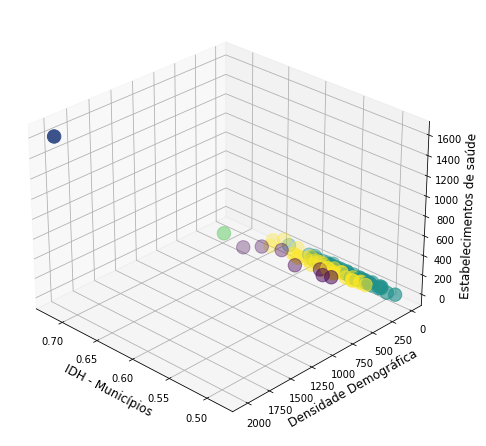

In [7]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)

plt.cla()
ax.set_xlabel('IDH - Municípios', fontsize=12)
ax.set_ylabel('Densidade Demográfica', fontsize=12)
ax.set_zlabel('Estabelecimentos de saúde', fontsize=12)

ax.scatter(X[:, 2], X[:, 1], X[:, 0], c= labels.astype(np.float), s=180)

## Filtragem dos dados de vacinação por cidade

In [8]:
# O dataset foi disponibilizado em três partes, cada qual com 900 Mb

df_vacina_part1 = pd.read_csv('vacina-1.csv', delimiter=";")
df_vacina_part1 = df_vacina_part1[['vacina_dataAplicacao', 'vacina_descricao_dose', 'estabelecimento_municipio_nome']]
print(df_vacina_part1.shape)

/home/khrir/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1898728, 3)


In [9]:
df_vacina_part2 = pd.read_csv('vacina-2.csv', delimiter=";")
df_vacina_part2 = df_vacina_part2[['vacina_dataAplicacao', 'vacina_descricao_dose', 'estabelecimento_municipio_nome']]
print(df_vacina_part2.shape)

(1894917, 3)


In [10]:
df_vacina_part3 = pd.read_csv('vacina-3.csv', delimiter=";")
df_vacina_part3 = df_vacina_part3[['vacina_dataAplicacao', 'vacina_descricao_dose', 'estabelecimento_municipio_nome']]
print(df_vacina_part3.shape)

(1901199, 3)


In [11]:
vacina_desc_2dose = "2ª Dose"

# Filtrar as pessoas que tomaram a 2° dose da vacina, em tese, estão imunizadas
# Agrupar por cidade de modo a descobrir quantas pessoas foram vacinadas em cada cidade
def filtrar(csv):
    df_filtered_2dose = csv.loc[(csv['vacina_descricao_dose'] == vacina_desc_2dose) & (csv["vacina_descricao_dose"].notnull())]
    return df_filtered_2dose


In [12]:
vacina_part1 = filtrar(df_vacina_part1)
vacina_part2 = filtrar(df_vacina_part2)
vacina_part3 = filtrar(df_vacina_part3)

vacina_part1.shape

(713441, 3)

In [13]:
def classificar(df):
    if df.loc[(df['vacina_dataAplicacao'] >= '2020-12-01') & (df['vacina_dataAplicacao'] < '2021-03-01')]:
        df['Estação'] = 1
    elif df.loc[(df['vacina_dataAplicacao'] >= '2021-03-01') & (df['vacina_dataAplicacao'] < '2021-06-01')]:
        df['Estação'] = 2
    elif df.loc[(df['vacina_dataAplicacao'] >= '2021-06-01') & (df['vacina_dataAplicacao'] < '2021-09-01')]:
        df['Estação'] = 3
    elif df.loc[(df['vacina_dataAplicacao'] >= '2021-09-01') & (df['vacina_dataAplicacao'] < '2021-12-01')]:
        df['Estação'] = 4


In [36]:
# Separar os dados de vacinação por estação do ano

# Bloco dados verão
def verao(df):
    verao = df.loc[(df['vacina_dataAplicacao'] >= '2020-12-01') & (df['vacina_dataAplicacao'] < '2021-03-01')]
    verao = verao[['estabelecimento_municipio_nome', 'vacina_descricao_dose']]
    verao_groupped = verao.groupby(['estabelecimento_municipio_nome']).count()
    verao_groupped.rename(columns={'vacina_descricao_dose': '2a_dose'}, inplace=True)
    return verao_groupped

# Bloco dados outono
def outono(df):
    outono = df.loc[(df['vacina_dataAplicacao'] >= '2021-03-01') & (df['vacina_dataAplicacao'] < '2021-06-01')]
    outono = outono[['estabelecimento_municipio_nome', 'vacina_descricao_dose']]
    outono_groupped = outono.groupby(['estabelecimento_municipio_nome']).count()
    outono_groupped.rename(columns={'vacina_descricao_dose': '2a_dose'}, inplace=True)
    return outono_groupped

# Bloco dados inverno
def inverno(df):
    inverno = df.loc[(df['vacina_dataAplicacao'] >= '2021-06-01') & (df['vacina_dataAplicacao'] < '2021-09-01')]
    inverno = inverno[['estabelecimento_municipio_nome', 'vacina_descricao_dose']]
    inverno_groupped = inverno.groupby(['estabelecimento_municipio_nome']).count()
    inverno_groupped.rename(columns={'vacina_descricao_dose': '2a_dose'}, inplace=True)
    
    return inverno_groupped

# Bloco dados primavera
def primavera(df):
    primavera = df.loc[(df['vacina_dataAplicacao'] >= '2021-09-01') & (df['vacina_dataAplicacao'] < '2021-12-01')]
    primavera = primavera[['estabelecimento_municipio_nome', 'vacina_descricao_dose']]
    primavera_groupped = primavera.groupby(['estabelecimento_municipio_nome']).count()
    primavera_groupped.rename(columns={'vacina_descricao_dose': '2a_dose'}, inplace=True)
    return primavera_groupped

In [37]:
# resultados da seleção por estação
verao1 = verao(vacina_part1)
verao2 = verao(vacina_part2)
verao3 = verao(vacina_part3)

outono1 = outono(vacina_part1)
outono2 = outono(vacina_part2)
outono3 = outono(vacina_part3)

inverno1 = inverno(vacina_part1)
inverno2 = inverno(vacina_part2)
inverno3 = inverno(vacina_part3)

primavera1 = primavera(vacina_part1)
primavera2 = primavera(vacina_part2)
primavera3 = primavera(vacina_part3)

In [43]:
verao_full = verao1 + verao2 + verao3
outono_full = outono1 + outono2 + outono3
inverno_full = inverno1 + inverno2 + inverno3
primavera_full = primavera1 + primavera2 + primavera3

verao_full['season'] = 1
verao_full['city'] = verao_full.index
outono_full['season'] = 2
outono_full['city'] = outono_full.index
inverno_full['season'] = 3
inverno_full['city'] = inverno_full.index
primavera_full['season'] = 4
primavera_full['city'] = primavera_full.index

# OBS: o filtro dos dados para o verão não está contando o município de Dois Riachos
# Logo, considera-se que não houve aplicação de segunda dose durante o período
df_mergered = pd.merge_ordered(verao_full, outono_full)
df_mergered = pd.merge_ordered(df_mergered, inverno_full)
df_mergered = pd.merge_ordered(df_mergered, primavera_full)

In [53]:
df_mergered.to_csv('vacina_mergered.csv', index=False)

## 2th Clusterização

In [17]:
df_Dados_2th_clus = pd.read_csv('AL_Dados_2th_Clusterização.csv')
df_Dados_2th_clus = df_Dados_2th_clus[['Município', 'Densidade demografica 2021', 'Estabelecimentos/10k_habitantes', 'Óbitos/10k_habitantes']]
df_Dados_2th_clus.head()

,Município,Densidade demografica 2021,Estabelecimentos/10k_habitantes,Óbitos/10k_habitantes
0,Água Branca,43.28,10.86,14.81
1,Anadia,94.06,6.85,21.13
2,Arapiraca,677.87,14.60,23.90
3,Atalaia,89.15,6.31,11.78
4,Barra de Santo Antônio,123.33,7.41,20.37


In [18]:
X_2th = df_Dados_2th_clus.values[:,1:]
X_2th = np.nan_to_num(X_2th)
Clus_2th = StandardScaler().fit_transform(X_2th)

In [19]:
k_means_2th = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means_2th.fit(X_2th)
labels_2th = k_means_2th.labels_

In [20]:
df_Dados_2th_clus["Cluster"] = labels_2th
df_Dados_2th_clus.head(5)

,Município,Densidade demografica 2021,Estabelecimentos/10k_habitantes,Óbitos/10k_habitantes,Cluster
0,Água Branca,43.28,10.86,14.81,3
1,Anadia,94.06,6.85,21.13,0
2,Arapiraca,677.87,14.60,23.90,2
3,Atalaia,89.15,6.31,11.78,0
4,Barra de Santo Antônio,123.33,7.41,20.37,0


In [21]:
df_Dados_2th_clus.groupby('Cluster').mean()

,Densidade demografica 2021,Estabelecimentos/10k_habitantes,Óbitos/10k_habitantes
Cluster,,,
0,115.905714,8.718571,13.896286
1,2025.440000,15.650000,29.140000
2,677.870000,14.600000,23.900000
3,51.902241,10.719655,21.092069
4,237.392857,8.365714,14.145714


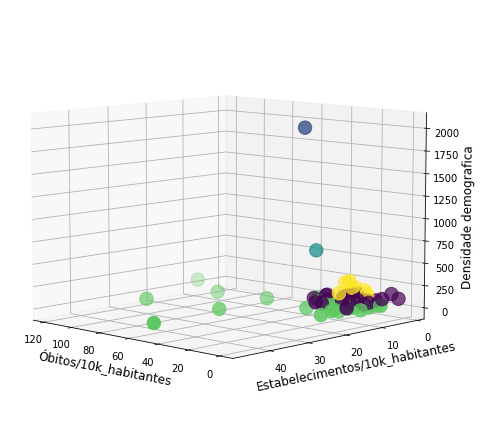

In [22]:
fig_2th = plt.figure(1, figsize=(8, 6))
plt.clf()
ax_2th = Axes3D(fig_2th, rect=[0, 0, .95, 1], elev=8, azim=134)

plt.cla()
ax_2th.set_xlabel('Óbitos/10k_habitantes', fontsize=12)
ax_2th.set_ylabel('Estabelecimentos/10k_habitantes', fontsize=12)
ax_2th.set_zlabel('Densidade demografica', fontsize=12)

ax_2th.scatter(X_2th[:, 2], X_2th[:, 1], X_2th[:, 0], c= labels_2th.astype(float), s=180)

## 3th Clusterização

In [59]:
cities_df = pd.read_csv('../city_season.csv')
cities_df.set_index(['Cidade'], inplace=True)
cities_df.head()

,Casos,Óbitos,Estação,2a_dose,População estimada 2021,Estabelecimentos de Saúde 2021,Casos/10k,Óbitos/10k,Vacinados/10k,Estabelecimentos/10k
Cidade,,,,,,,,,,
Água Branca,140,7,1,372,20263,22,69.09,3.45,183.59,10.86
Anadia,253,6,1,96,17507,12,144.51,3.43,54.84,6.85
Arapiraca,3517,54,1,1418,234309,342,150.10,2.30,60.52,14.60
Atalaia,92,7,1,144,47540,30,19.35,1.47,30.29,6.31
Barra de Santo Antônio,22,1,1,61,16201,12,13.58,0.62,37.65,7.41


In [70]:
cities_df = cities_df[['Estação', 'Casos/10k', 'Óbitos/10k', 'Estabelecimentos/10k', 'Vacinados/10k']]

X_3th = cities_df.values[:,0:]
X_3th = np.nan_to_num(X_3th)
Clus_3th = StandardScaler().fit_transform(X_3th)
Clus_3th


array([[-1.34164079, -0.14252644,  0.38045491,  0.16340194, -0.83794105],
       [-1.34164079,  0.50185333,  0.37379316, -0.56290389, -0.93554228],
       [-1.34164079,  0.54961365, -0.00259613,  0.84080439, -0.93123645],
       ...,
       [ 1.34164079, -0.70223632, -0.76869821, -0.70055787,  0.66228257],
       [ 1.34164079, -0.56963523, -0.76869821, -0.37634653,  0.847289  ],
       [ 1.34164079, -0.70283439, -0.63879394, -0.11009477,  0.90069487]])

In [75]:
k_means_3th = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means_3th.fit(X_3th)
labels_3th = k_means_3th.labels_
cities_df["Cluster"] = labels_3th
cities_df.head()

,Estação,Casos/10k,Óbitos/10k,Estabelecimentos/10k,Vacinados/10k,Cluster
Cidade,,,,,,
Água Branca,1,69.09,3.45,10.86,183.59,4
Anadia,1,144.51,3.43,6.85,54.84,4
Arapiraca,1,150.10,2.30,14.60,60.52,4
Atalaia,1,19.35,1.47,6.31,30.29,4
Barra de Santo Antônio,1,13.58,0.62,7.41,37.65,4


In [76]:
cities_df.groupby('Cluster').mean()
# cities_df.to_csv('ver.csv')

,Estação,Casos/10k,Óbitos/10k,Estabelecimentos/10k,Vacinados/10k
Cluster,,,,,
0,2.218487,121.756891,3.124622,9.180672,830.505966
1,3.266667,89.550857,2.726095,9.405619,1682.989905
2,3.600000,240.850000,4.340000,36.648000,9459.824000
3,3.861111,46.968472,1.581250,10.927083,2704.667222
4,1.093458,60.906168,1.382804,9.464673,77.701589


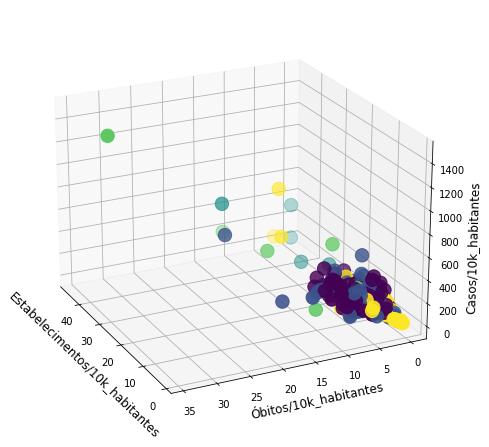

In [77]:
fig_3th = plt.figure(1, figsize=(8, 6))
plt.clf()
ax_3th = Axes3D(fig_3th, rect=[0, 0, .95, 1], elev=22, azim=154)

plt.cla()
ax_3th.set_xlabel('Estabelecimentos/10k_habitantes', fontsize=12)
ax_3th.set_ylabel('Óbitos/10k_habitantes', fontsize=12)
ax_3th.set_zlabel('Casos/10k_habitantes', fontsize=12)

ax_3th.scatter(X_3th[:, 3], X_3th[:, 2], X_3th[:, 1], c= labels_3th.astype(float), s=180)

Text(0.5, 1.0, 'Correlation Matrix')

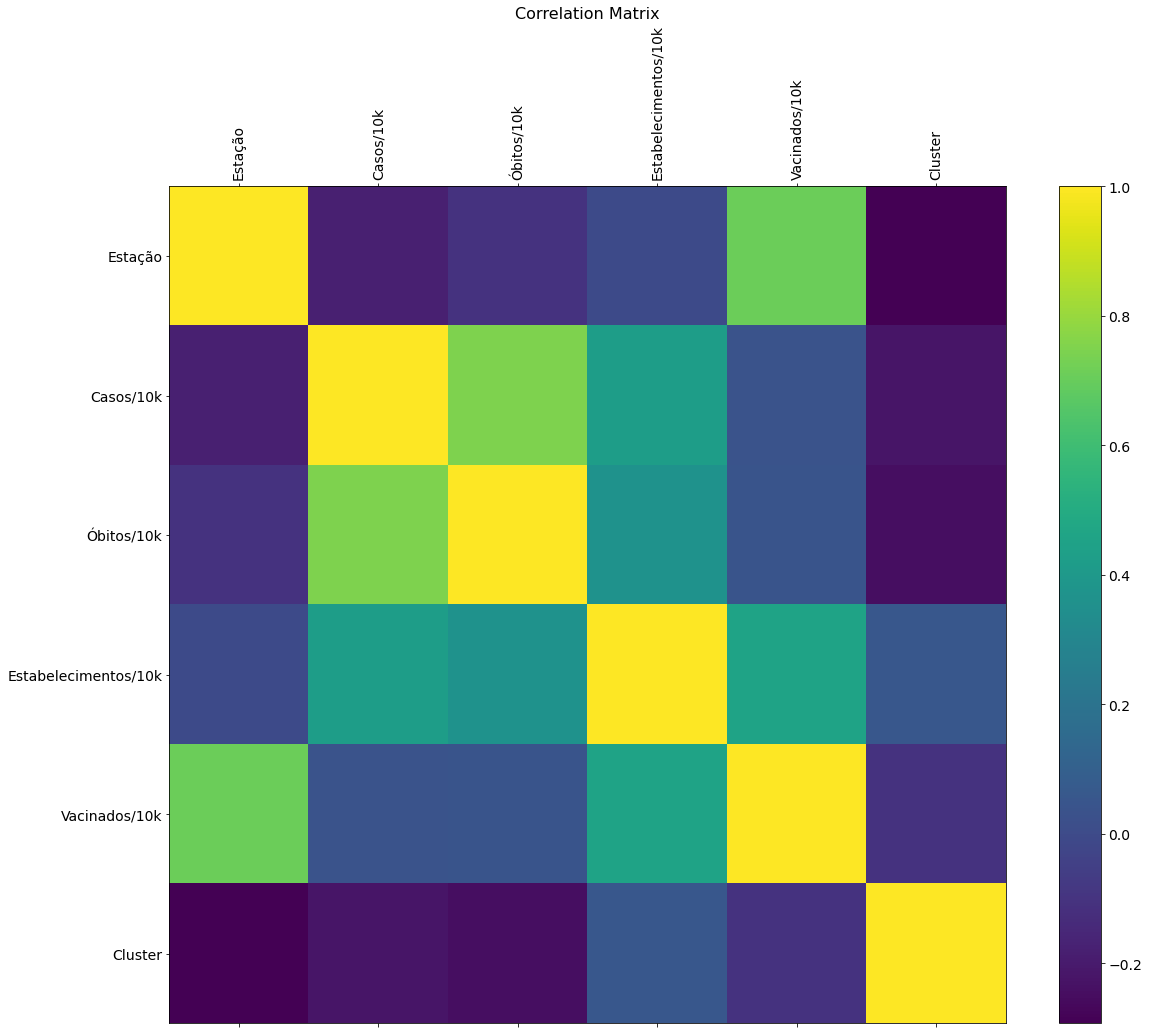

In [80]:
f = plt.figure(figsize=(19, 15))
plt.matshow(cities_df.corr(), fignum=f.number)
plt.xticks(range(cities_df.select_dtypes(['number']).shape[1]), cities_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(cities_df.select_dtypes(['number']).shape[1]), cities_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

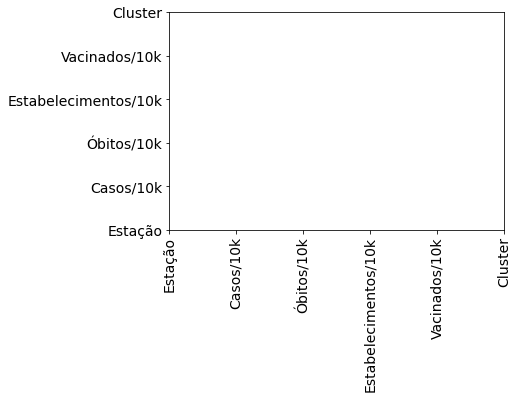